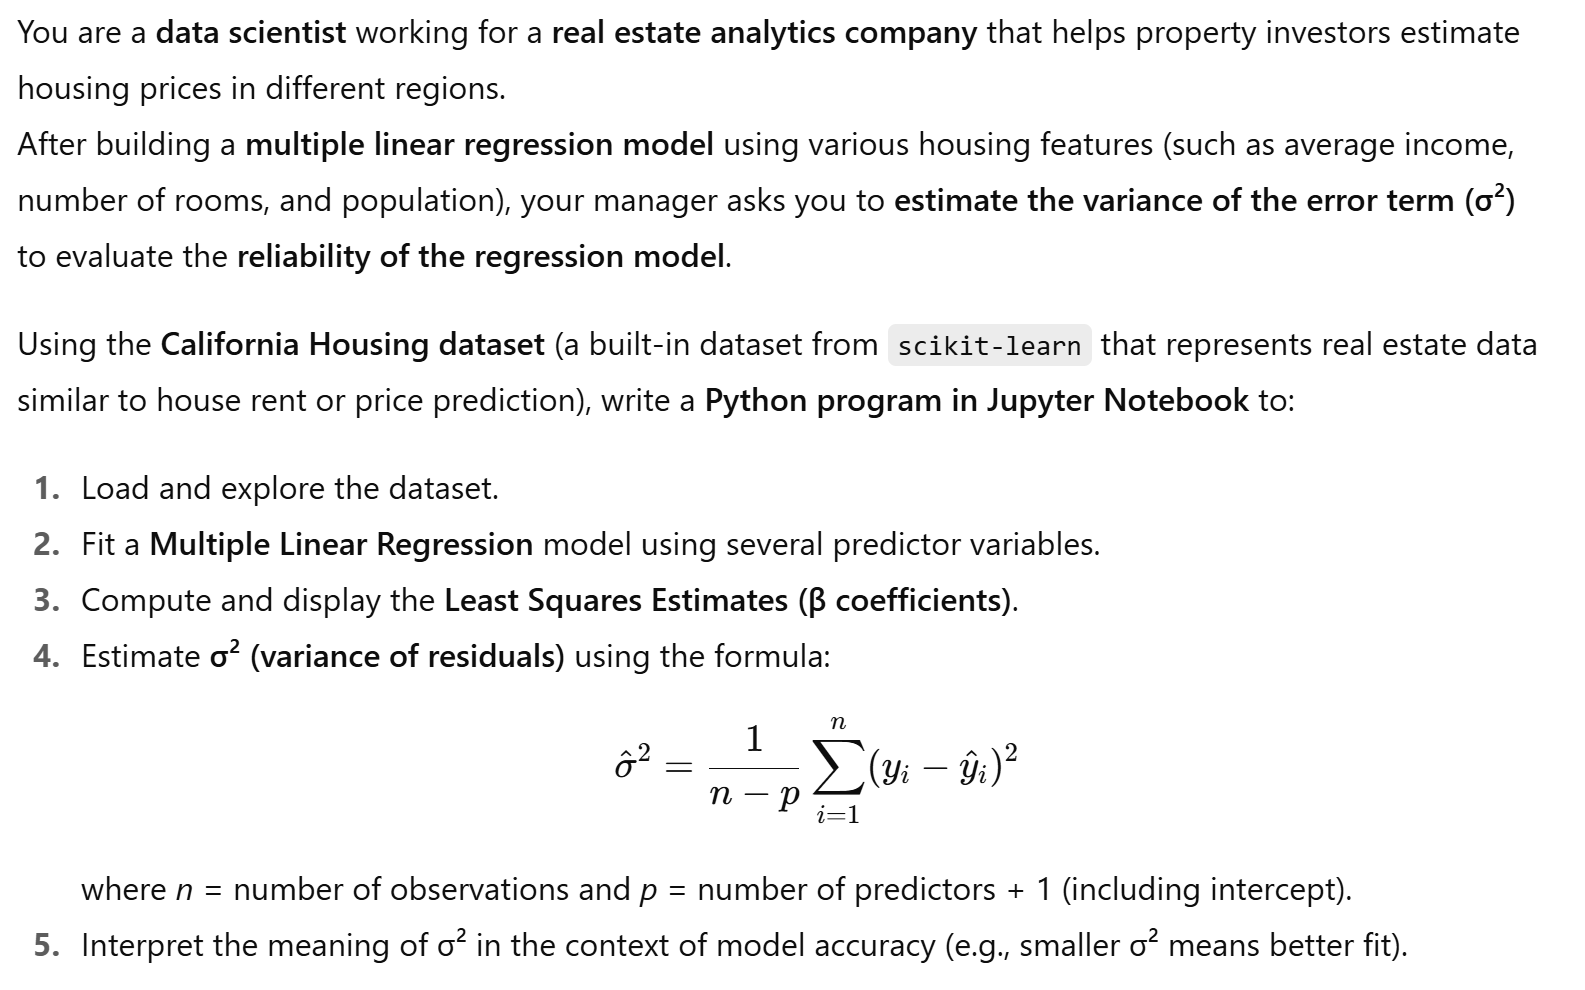

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
# Step 1: Load the dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

In [4]:
# Display first few rows
print("Sample Data:")
display(df.head())

Sample Data:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
# Step 2: Define predictor (X) and target (y)
# Using multiple predictors for multiple regression
X = df[['MedInc', 'AveRooms', 'AveOccup', 'HouseAge']]
y = df['MedHouseVal']

In [6]:
# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Step 4: Fit Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Predicted values
y_pred = model.predict(X_test)

In [9]:
# Step 5: Compute Residuals
residuals = y_test - y_pred

In [10]:

# Step 6: Estimate σ² (variance of residuals)
n = len(y_test)              # number of observations
p = X_train.shape[1] + 1     # number of parameters including intercept
sigma_squared = np.sum(residuals ** 2) / (n - p)

In [11]:
# Display results
print("\nModel Coefficients (β Estimates):")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

print(f"\nEstimated σ² (Variance of Residuals): {sigma_squared:.6f}")


Model Coefficients (β Estimates):
MedInc: 0.4455
AveRooms: -0.0284
AveOccup: -0.0041
HouseAge: 0.0169
Intercept: 0.0267

Estimated σ² (Variance of Residuals): 0.658249


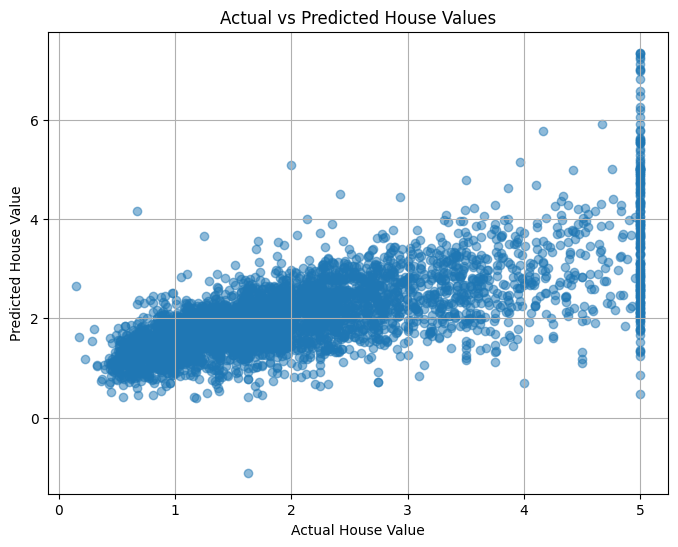

In [12]:

# Step 7: Plot Actual vs Predicted Values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Actual vs Predicted House Values")
plt.grid(True)
plt.show()

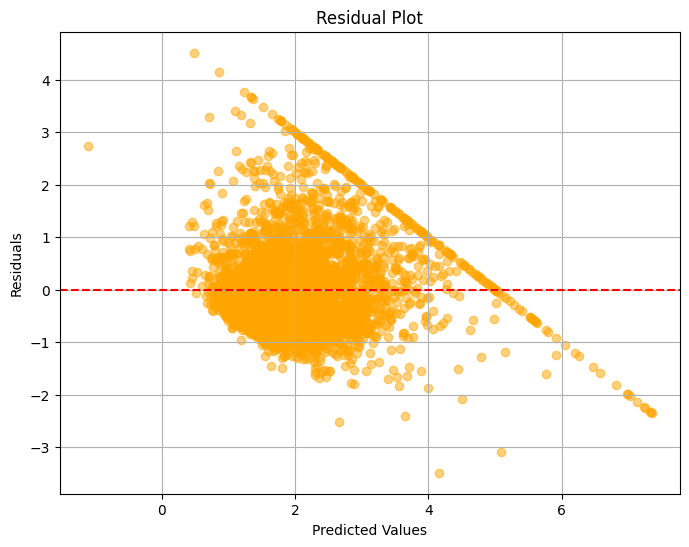

In [13]:
# Step 8: Plot Residuals
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.5, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()